In [1]:
import pandas as pd
import numpy as np

# Concatener des dataframes

In [ ]:
df1 =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                     'Score' : [89, 39, 50, 97, 22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
df2 =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                     'Score': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

In [ ]:
df1.head()

,StudentID,Score
0,1,89
1,3,39
2,5,50
3,7,97
4,9,22


In [ ]:
df2.head()

,StudentID,Score
0,2,98
1,4,93
2,6,44
3,8,77
4,10,69


In [ ]:
pd.concat([df1, df2], ignore_index=True)

,StudentID,Score
0,1,89
1,3,39
2,5,50
3,7,97
4,9,22
5,11,66
6,13,31
7,15,51
8,17,71
9,19,91


In [ ]:
pd.concat([df1, df2], ignore_index=True)

,StudentID,Score
0,1,89
1,3,39
2,5,50
3,7,97
4,9,22
5,11,66
6,13,31
7,15,51
8,17,71
9,19,91


# Merger des dataframes

In [7]:
df1 =  pd.DataFrame({ 'StudentID': [1, 2, 3],
                       'ScoreMath' : [22, 66, 31]})

df2 =  pd.DataFrame({ 'StudentID': [21, 8, 3],
                       'ScoreML' : [11, 85, 46]})

In [8]:
df1.merge(df2, how="inner")

,StudentID,ScoreMath,ScoreML
0,3,31,46


In [9]:
df1.merge(df2, how='outer')

,StudentID,ScoreMath,ScoreML
0,1,22.0,NaN
1,2,66.0,NaN
2,3,31.0,46.0
3,21,NaN,11.0
4,8,NaN,85.0


In [10]:
df1.merge(df2, how='right')

,StudentID,ScoreMath,ScoreML
0,21,NaN,11
1,8,NaN,85
2,3,31.0,46


In [11]:
df1.merge(df2, how='left')

,StudentID,ScoreMath,ScoreML
0,1,22,NaN
1,2,66,NaN
2,3,31,46.0


# Merging sur l'index

In [ ]:
left1 = pd.DataFrame({'key': ['apple','ball','apple', 'apple',
'ball', 'cat'], 'value': range(6)})
left1

,key,value
0,apple,0
1,ball,1
2,apple,2
3,apple,3
4,ball,4
5,cat,5


In [ ]:
right1 = pd.DataFrame({'group_val': [33.4, 5]}, index=['apple',
'ball'])
right1

,group_val
apple,33.4
ball,5.0


In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,apple,0,33.4
2,apple,2,33.4
3,apple,3,33.4
1,ball,1,5.0
4,ball,4,5.0


In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,apple,0,33.4
2,apple,2,33.4
3,apple,3,33.4
1,ball,1,5.0
4,ball,4,5.0
5,cat,5,NaN


# Reshaping and pivoting

In [ ]:
data = np.arange(15).reshape((3,5))
indexers = ['Rainfall', 'Humidity', 'Wind']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Bergen', 'Oslo', 'Trondheim', 'Stavanger', 'Kristiansand'])
dframe1

,Bergen,Oslo,Trondheim,Stavanger,Kristiansand
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


In [ ]:
stack = dframe1.stack()
stack

Rainfall  Bergen           0
          Oslo             1
          Trondheim        2
          Stavanger        3
          Kristiansand     4
Humidity  Bergen           5
          Oslo             6
          Trondheim        7
          Stavanger        8
          Kristiansand     9
Wind      Bergen          10
          Oslo            11
          Trondheim       12
          Stavanger       13
          Kristiansand    14
dtype: int64

In [ ]:
stack.unstack()

,Bergen,Oslo,Trondheim,Stavanger,Kristiansand
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


# Chercher et Supprimer les doublons

In [ ]:
frame3 = pd.DataFrame({'column 1': ['Looping'] * 3 + ['Functions']
* 4, 'column 2': [10, 10, 22, 23, 23, 24, 24]})
frame3

,column 1,column 2
0,Looping,10
1,Looping,10
2,Looping,22
3,Functions,23
4,Functions,23
5,Functions,24
6,Functions,24


In [ ]:
frame3.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [ ]:
frame3.drop_duplicates()

,column 1,column 2
0,Looping,10
2,Looping,22
3,Functions,23
5,Functions,24


In [ ]:
frame3.drop_duplicates().reset_index(drop=True)

,column 1,column 2
0,Looping,10
1,Looping,22
2,Functions,23
3,Functions,24


In [ ]:
frame3['col3'] = range(7)
frame3

,column 1,column 2,col3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,3
4,Functions,23,4
5,Functions,24,5
6,Functions,24,6


In [ ]:
frame3.drop_duplicates(['column 2']).reset_index(drop=True)

,column 1,column 2,col3
0,Looping,10,0
1,Looping,22,2
2,Functions,23,3
3,Functions,24,5


# Replacing des données

In [ ]:
frame3

,column 1,column 2,col3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,3
4,Functions,23,4
5,Functions,24,5
6,Functions,24,6


In [ ]:
frame4 = frame3.replace(to_replace=23, value=np.nan)
frame4

,column 1,column 2,col3
0,Looping,10.0,0
1,Looping,10.0,1
2,Looping,22.0,2
3,Functions,NaN,3
4,Functions,NaN,4
5,Functions,24.0,5
6,Functions,24.0,6


In [ ]:
frame4.replace(to_replace=np.nan, value=-1)

,column 1,column 2,col3
0,Looping,10.0,0
1,Looping,10.0,1
2,Looping,22.0,2
3,Functions,-1.0,3
4,Functions,-1.0,4
5,Functions,24.0,5
6,Functions,24.0,6


In [ ]:
frame3

,column 1,column 2,col3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,3
4,Functions,23,4
5,Functions,24,5
6,Functions,24,6


In [ ]:
frame3.replace(to_replace=[10, 23], value=[1, 2])

,column 1,column 2,col3
0,Looping,1,0
1,Looping,1,1
2,Looping,22,2
3,Functions,2,3
4,Functions,2,4
5,Functions,24,5
6,Functions,24,6


In [ ]:
frame3.iat[3, 2] = 12000

In [ ]:
frame3.at[5, "column 2"] = 12

# Les valeurs manquantes

In [ ]:
data = np.arange(15, 30).reshape(5, 3)
dfx = pd.DataFrame(data, index=['apple', 'banana', 'kiwi',
'grapes', 'mango'], columns=['store1', 'store2', 'store3'])
dfx

,store1,store2,store3
apple,15,16,17
banana,18,19,20
kiwi,21,22,23
grapes,24,25,26
mango,27,28,29


In [ ]:
dfx['store4'] = np.nan
dfx

,store1,store2,store3,store4
apple,15,16,17,NaN
banana,18,19,20,NaN
kiwi,21,22,23,NaN
grapes,24,25,26,NaN
mango,27,28,29,NaN


In [ ]:
dfx.loc['apple']

store1    15.0
store2    16.0
store3    17.0
store4     NaN
Name: apple, dtype: float64

In [ ]:
dfx.loc['orange'] = np.arange(15, 19)
dfx

,store1,store2,store3,store4
apple,15,16,17,NaN
banana,18,19,20,NaN
kiwi,21,22,23,NaN
grapes,24,25,26,NaN
mango,27,28,29,NaN
orange,15,16,17,18.0


In [ ]:
dfx.loc["strawberry"] = np.nan
dfx

,store1,store2,store3,store4
apple,15.0,16.0,17.0,NaN
banana,18.0,19.0,20.0,NaN
kiwi,21.0,22.0,23.0,NaN
grapes,24.0,25.0,26.0,NaN
mango,27.0,28.0,29.0,NaN
orange,15.0,16.0,17.0,18.0
strawberry,NaN,NaN,NaN,NaN


In [ ]:
dfx['store5'] = np.nan
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfx.loc["banana", "store2"] = -1
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfx.isnull().sum()

store1    1
store2    1
store3    1
store4    6
store5    7
dtype: int64

In [ ]:
dfx.isnull().mean(axis=0)

store1    0.142857
store2    0.142857
store3    0.142857
store4    0.857143
store5    1.000000
dtype: float64

In [ ]:
dfx.notnull()

,store1,store2,store3,store4,store5
apple,True,True,True,False,False
banana,True,True,True,False,False
kiwi,True,True,True,False,False
grapes,True,True,True,False,False
mango,True,True,True,False,False
orange,True,True,True,True,False
strawberry,False,False,False,False,False


In [ ]:
dfx.dropna()

,store1,store2,store3,store4,store5


In [ ]:
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfx.dropna(how='all')

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN


In [ ]:
dfx.dropna(how='all', axis=1)

,store1,store2,store3,store4
apple,15.0,16.0,17.0,NaN
banana,18.0,-1.0,20.0,NaN
kiwi,21.0,22.0,23.0,NaN
grapes,24.0,25.0,26.0,NaN
mango,27.0,28.0,29.0,NaN
orange,15.0,16.0,17.0,18.0
strawberry,NaN,NaN,NaN,NaN


In [ ]:
dfx.dropna(thresh=5, axis=1)

,store1,store2,store3
apple,15.0,16.0,17.0
banana,18.0,-1.0,20.0
kiwi,21.0,22.0,23.0
grapes,24.0,25.0,26.0
mango,27.0,28.0,29.0
orange,15.0,16.0,17.0
strawberry,NaN,NaN,NaN


In [ ]:
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfx.fillna(0)

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,0.0,0.0
banana,18.0,-1.0,20.0,0.0,0.0
kiwi,21.0,22.0,23.0,0.0,0.0
grapes,24.0,25.0,26.0,0.0,0.0
mango,27.0,28.0,29.0,0.0,0.0
orange,15.0,16.0,17.0,18.0,0.0
strawberry,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfx.mean()

store1    20.000000
store2    17.666667
store3    22.000000
store4    18.000000
store5          NaN
dtype: float64

In [ ]:
dfx.fillna(dfx.mean())

,store1,store2,store3,store4,store5
apple,15.0,16.000000,17.0,18.0,NaN
banana,18.0,-1.000000,20.0,18.0,NaN
kiwi,21.0,22.000000,23.0,18.0,NaN
grapes,24.0,25.000000,26.0,18.0,NaN
mango,27.0,28.000000,29.0,18.0,NaN
orange,15.0,16.000000,17.0,18.0,NaN
strawberry,20.0,17.666667,22.0,18.0,NaN


In [ ]:
# backward forward filling
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfx.store4.fillna(method='ffill')

apple          NaN
banana         NaN
kiwi           NaN
grapes         NaN
mango          NaN
orange        18.0
strawberry    18.0
Name: store4, dtype: float64

In [ ]:
dfx.store4.fillna(method='bfill')

apple         18.0
banana        18.0
kiwi          18.0
grapes        18.0
mango         18.0
orange        18.0
strawberry     NaN
Name: store4, dtype: float64

In [ ]:
# interpoler les valeurs manquantes
n_ventes = pd.Series([100, np.nan, np.nan, 200, np.nan, 150]
)
n_ventes.interpolate()

0    100.000000
1    133.333333
2    166.666667
3    200.000000
4    175.000000
5    150.000000
dtype: float64

# Transformer les variables numériques en catégories

In [ ]:
notes = np.random.randint(20, size=(15,))

In [ ]:
notes

array([12, 12, 15,  8, 11,  6,  2, 13,  0,  2, 12, 11, 15, 13,  1])

In [ ]:
bins = [-1,10, 12, 15, 18, 20]

In [ ]:
bins_names = ['echoué', 'passable', 'assez-bien', 'bien', 'très bien']

In [ ]:
category = pd.cut(notes, bins, right=False, labels=bins_names)

In [ ]:
category

['assez-bien', 'assez-bien', 'bien', 'echoué', 'passable', ..., 'assez-bien', 'passable', 'bien', 'assez-bien', 'echoué']
Length: 15
Categories (5, object): ['echoué' < 'passable' < 'assez-bien' < 'bien' < 'très bien']

In [ ]:
Aggregations

# Aggregations avec groupby

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
data = '/gdrive/My Drive/DataKev/data/'

In [ ]:
auto = pd.read_csv(data + 'Automobile_data.csv')

In [ ]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
auto['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [ ]:
auto.groupby('body-style')

In [ ]:
auto.groupby('body-style').groups

{'convertible': [0, 1, 72, 128, 172, 189], 'hardtop': [69, 74, 98, 126, 127, 167, 168, 170], 'hatchback': [2, 9, 18, 19, 21, 22, 23, 24, 29, 30, 31, 32, 33, 34, 37, 38, 46, 50, 51, 52, 55, 56, 57, 58, 59, 61, 64, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 95, 99, 104, 105, 106, 118, 119, 120, 124, 125, 129, 131, 132, 134, 136, 138, 139, 140, 150, 151, 152, 157, 159, 161, 164, 166, 169, 171, 175, 177, 178, 179, 190], 'sedan': [3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 20, 25, 26, 27, 35, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 53, 54, 60, 62, 63, 65, 66, 67, 70, 71, 73, 85, 86, 87, 88, 89, 90, 91, 92, 94, 96, 100, 101, 103, 107, 108, 111, 112, 115, 116, 117, 121, 122, 133, 135, 137, 141, 142, 143, 144, 145, 156, 158, 160, 162, 163, 165, 173, 174, 176, 180, 182, 183, 184, 185, 186, 187, 188, 191, 192, 194, 196, 198, 200, 201, 202, 203, 204], 'wagon': [7, 28, 36, 68, 93, 97, 102, 109, 110, 113, 114, 123, 130, 146, 147, 148, 149, 153, 154, 155, 181, 193, 195, 197, 199]}

In [ ]:
auto.groupby('body-style').groups.keys()

dict_keys(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'])

In [ ]:
style = auto.groupby('body-style')
style.get_group('hardtop')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
69,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400
98,2,168,nissan,gas,std,two,hardtop,fwd,front,95.1,162.4,63.8,53.3,2008,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249
126,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528
127,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028
167,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,52.0,2540,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,8449
168,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,52.0,2536,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
170,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,52.0,2679,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199


In [ ]:
auto['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [ ]:
double_groupin = auto.groupby(["body-style", 'drive-wheels'])

In [ ]:
double_groupin.first()

symboling normalized-losses  ... highway-mpg  price
body-style  drive-wheels                               ...                   
convertible fwd                   3                 ?  ...          29  11595
            rwd                   3                 ?  ...          27  13495
hardtop     fwd                   2               168  ...          37   8249
            rwd                   0                93  ...          25  28176
hatchback   4wd                   0                 ?  ...          22      ?
            fwd                   2               121  ...          53   5151
            rwd                   1                 ?  ...          26  16500
sedan       4wd                   2               164  ...          22  17450
            fwd                   2               164  ...          30  13950
            rwd                   2               192  ...          29  16430
wagon       4wd                   0                85  ...          29   8013
            fwd                   1                 ?  ...          25  18920
            rwd                  -1                93  ...          25  28248

[13 rows x 24 columns]

In [ ]:
style.first()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
body-style,,,,,,,,,,,,,,,,,,,,,,,,,
convertible,3,?,alfa-romero,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
hardtop,0,93,mercedes-benz,diesel,turbo,two,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
hatchback,1,?,alfa-romero,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
sedan,2,164,audi,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
wagon,1,?,audi,gas,std,four,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
style['city-mpg'].mean()

body-style
convertible    20.500000
hardtop        21.625000
hatchback      26.314286
sedan          25.322917
wagon          24.040000
Name: city-mpg, dtype: float64

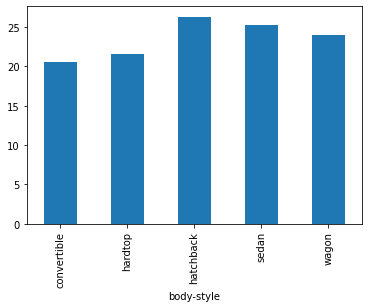

In [ ]:
style['city-mpg'].mean().plot(kind='bar')

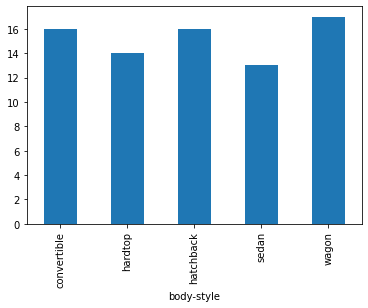

In [ ]:
style['city-mpg'].min().plot(kind='bar')

In [ ]:
style.get_group('convertible').mean()

symboling            2.833333e+00
wheel-base           9.270000e+01
length               1.703833e+02
width                6.558333e+01
height               5.143333e+01
curb-weight          2.801667e+03
engine-size          1.571667e+02
compression-ratio    8.933333e+00
horsepower           1.851853e+15
peak-rpm             8.334167e+22
city-mpg             2.050000e+01
highway-mpg          2.600000e+01
price                2.249194e+28
dtype: float64

In [ ]:
style.agg(['mean', 'max'])

symboling      wheel-base         ...   city-mpg     highway-mpg    
                 mean max        mean    max  ...       mean max        mean max
body-style                                    ...                               
convertible  2.833333   3   92.700000   98.4  ...  20.500000  24   26.000000  30
hardtop      1.875000   3   98.500000  112.0  ...  21.625000  31   27.250000  37
hatchback    1.585714   3   95.535714  102.9  ...  26.314286  49   32.171429  54
sedan        0.333333   2  100.619792  120.9  ...  25.322917  45   30.833333  50
wagon       -0.160000   1  102.156000  114.2  ...  24.040000  31   28.720000  37

[5 rows x 20 columns]